# random forest classifier -- employee attrition

In [1]:
# import for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df= pd.read_csv("C:\\classification problems\\Employee_Attrition.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.Department.value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

# data cleaning

In [5]:
# drop duplicate columns
df.drop_duplicates(inplace= True)

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
for features in df.columns:
    print(f"{features}:{df[features].nunique()}")

satisfaction_level:92
last_evaluation:65
number_project:6
average_montly_hours:215
time_spend_company:8
Work_accident:2
left:2
promotion_last_5years:2
Department:10
salary:3


In [8]:
categorical_cols= [features for features in df.columns if df[features].nunique() < 20]
numerical_cols= [cols for cols in df.columns if df[cols].nunique() > 20]

# exploratory data analysis

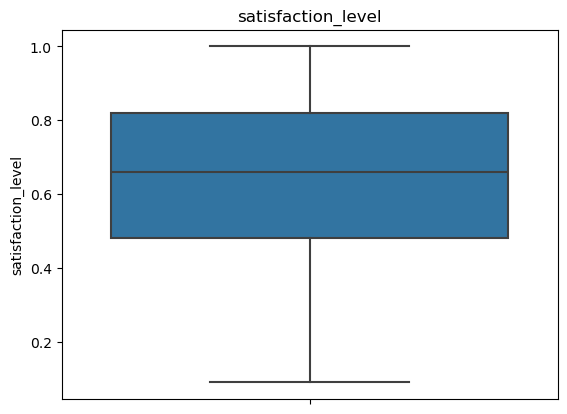

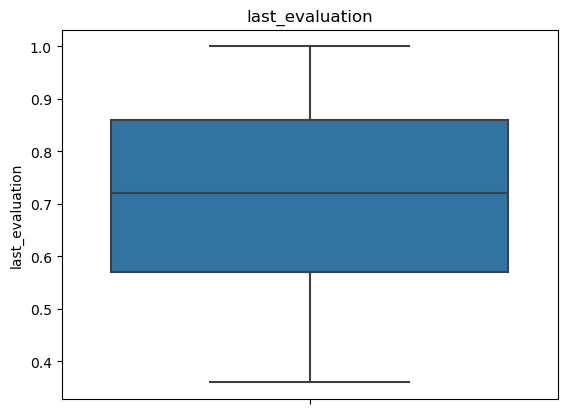

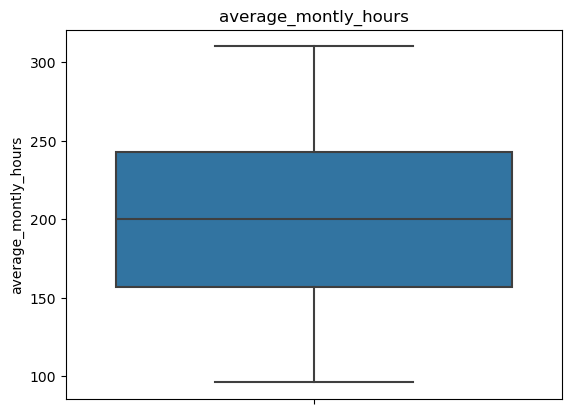

In [9]:
# check for feature distributon
for cols in numerical_cols:
    plt.figure()
    sns.boxplot(data= df,y= cols)
    plt.title(cols)

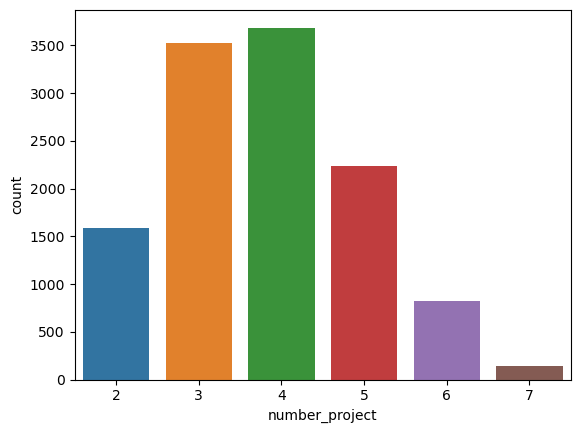

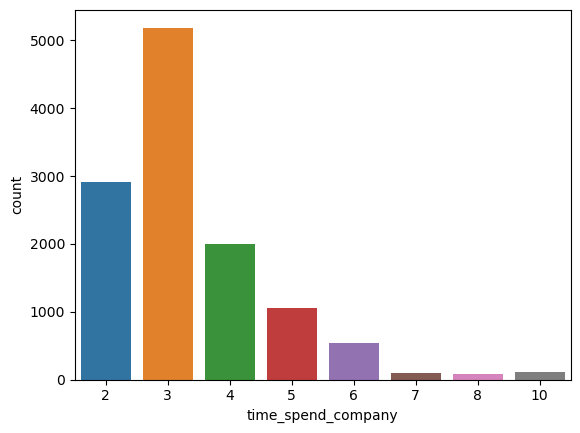

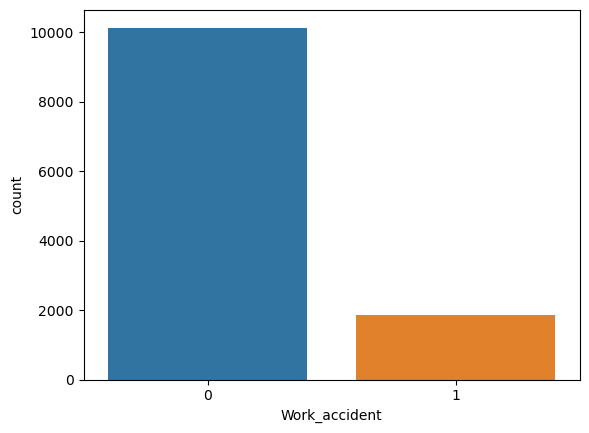

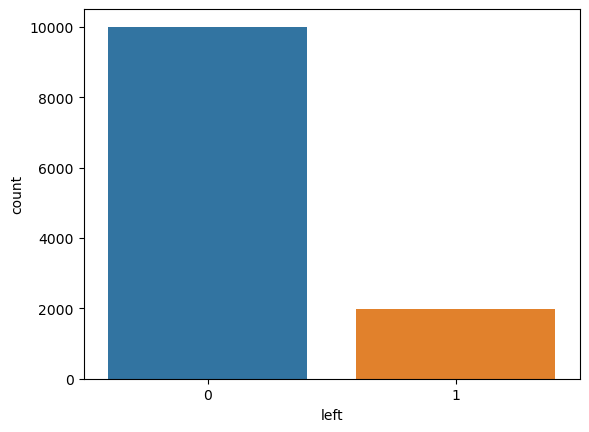

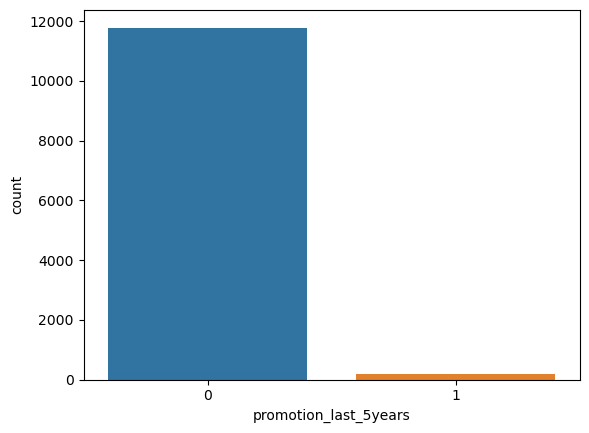

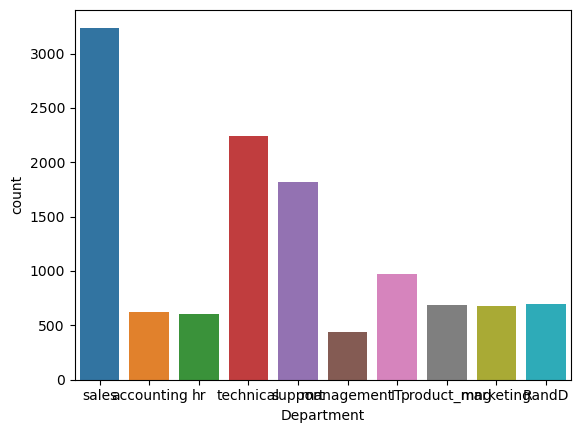

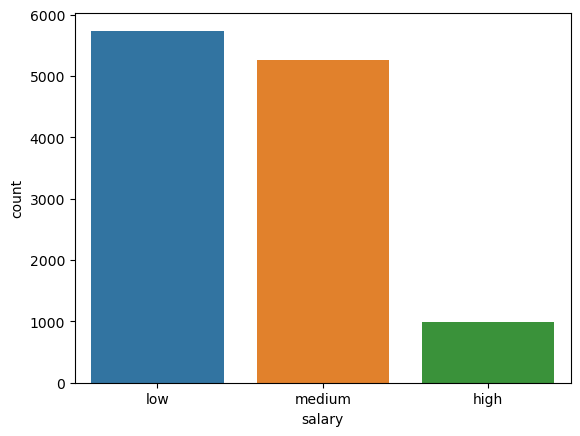

In [10]:
for cols in categorical_cols:
    plt.figure()
    sns.countplot(data= df,x= cols )

In [11]:
features= [cols for cols in df.columns if df[cols].dtypes != "object"]

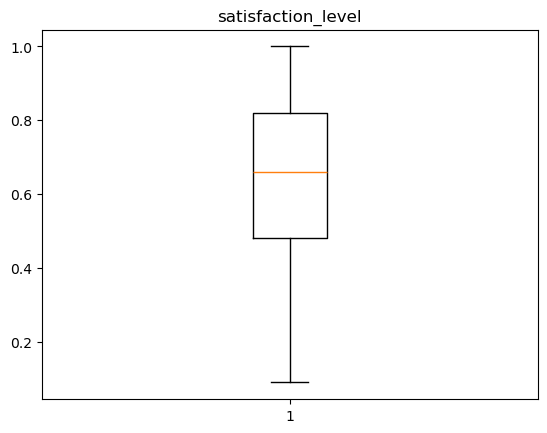

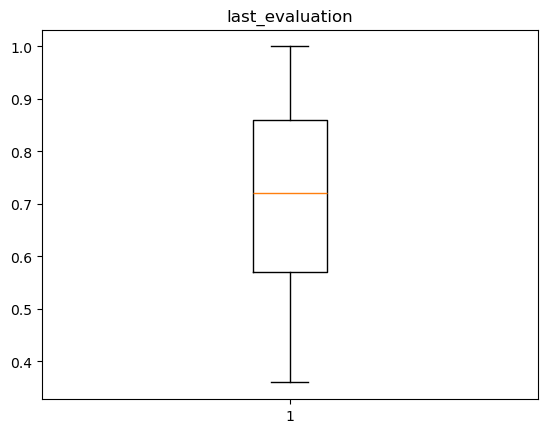

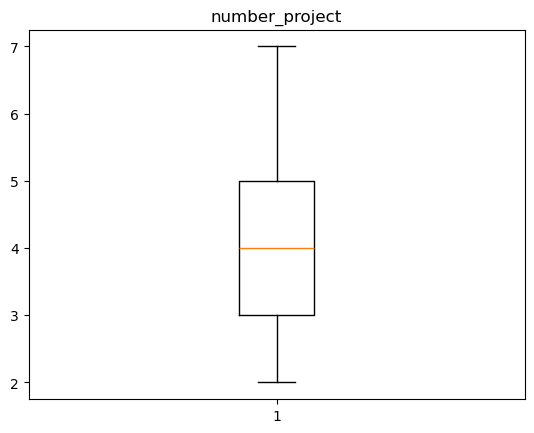

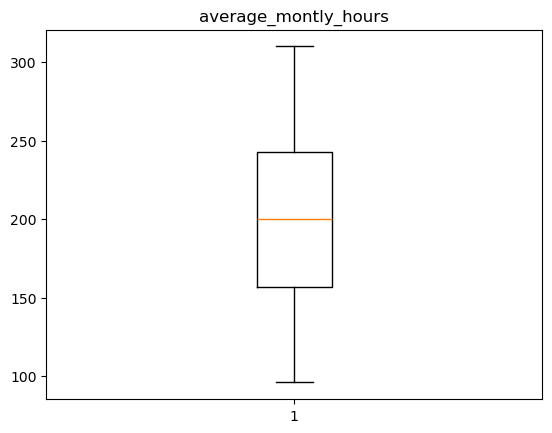

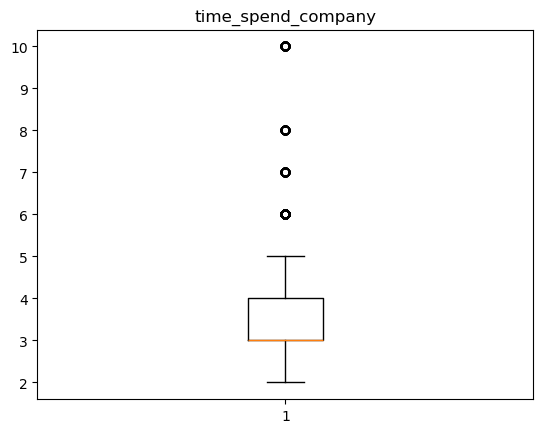

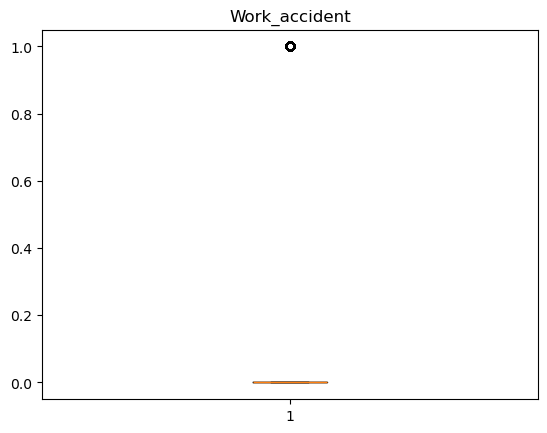

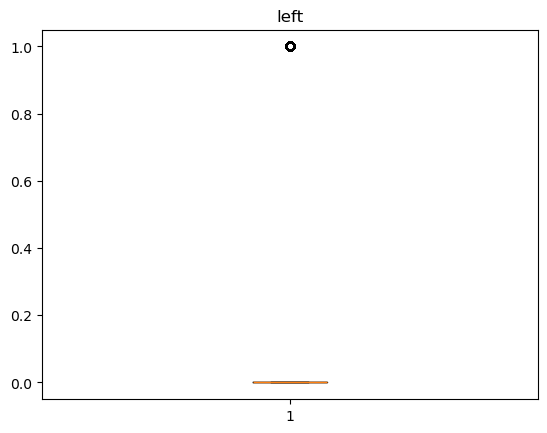

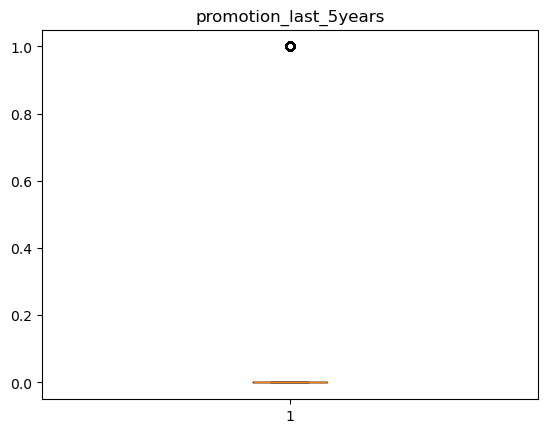

In [12]:
# visualise the distribution of numerical variables using a boxplot
for feat in features:
    plt.figure()
    plt.boxplot(data= df,x= feat)
    plt.title(feat)

In [13]:
# perform one hot encoding on categorical variables
dummy_df= pd.get_dummies(df,columns= ["Department","salary"],drop_first= True,dtype= int)
dummy_df.shape

(11991, 19)

In [14]:
# divide the dataset inot features and labels
X= dummy_df.drop("left",axis= 1)
y= dummy_df.left

In [15]:
# train-test-split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2)

In [16]:
# perform feature scaling for improved efficiency
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
X_train= std_scaler.fit_transform(X_train)
X_test= std_scaler.transform(X_test)

In [17]:
# development of model
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_model= RFC()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
# make predictions off the model
predictions= rfc_model.predict(X_test)

# evaluation 

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm= confusion_matrix(y_test,predictions,normalize= "all")
score= accuracy_score(y_test,predictions)

<Axes: >

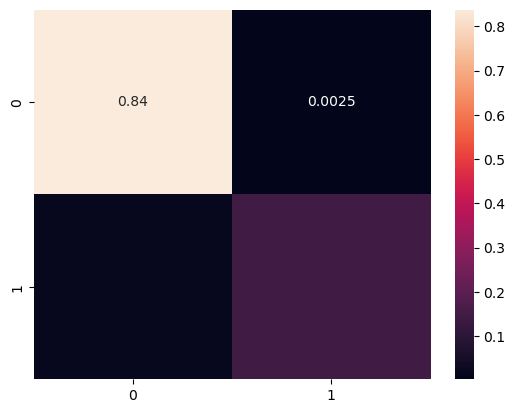

In [20]:
# visualise the confusion matirx using a heat map
sns.heatmap(cm,annot= True)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2016
           1       0.98      0.90      0.94       383

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [22]:
rfc_model.feature_importances_

array([0.31003986, 0.13791691, 0.19119011, 0.15643261, 0.16467794,
       0.00909138, 0.00119592, 0.00186298, 0.00180419, 0.00170791,
       0.00149067, 0.00179578, 0.00144775, 0.00350881, 0.00255963,
       0.00310063, 0.00682375, 0.00335317])

<BarContainer object of 18 artists>

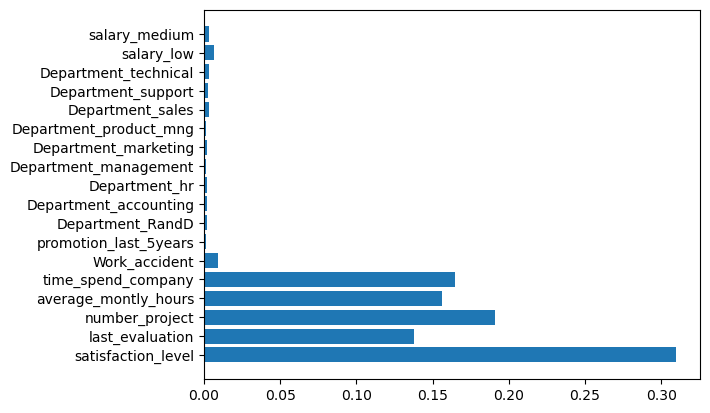

In [23]:
plt.barh(X.columns,rfc_model.feature_importances_)

In [24]:
# use grid search cv to optimise hyperparameters
from sklearn.model_selection import GridSearchCV
parameters= {"n_estimators":[50,100],"max_features":["sqrt","log2",None]}

In [25]:
gs_model= GridSearchCV(estimator= rfc_model,param_grid= parameters)
gs_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [26]:
# get the combination of best parameters 
gs_model.best_params_

{'max_features': None, 'n_estimators': 100}

In [27]:
# build a model with the given parameters
rfc_model2= RFC(max_features= "log2",n_estimators= 100)
rfc_model2.fit(X_train,y_train)

RandomForestClassifier(max_features='log2')

In [33]:
# make predictions off the new model
predictions2= rfc_model2.predict(X_test)

In [34]:
# make a classification report
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2016
           1       0.99      0.90      0.94       383

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

